# Task 2: Exploratory Data Analysis on Titanic Dataset

## Importing Important libaries

In [2]:
pip uninstall pandas -y

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pandas

  Using cached pandas-2.3.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.3.2-cp39-cp39-win_amd64.whl (11.3 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ashar\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\ashar\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\ashar\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 68, in wrapper
    return func(self, options, args)
  File "C:\Users\ashar\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 486, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\ashar\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\ashar\anaconda3\lib\site-packages\pip\_v

In [2]:
pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pandas matplotlib seaborn numexpr bottleneck

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.4 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.0 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.0 MB 1.7 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.0 MB 1.7 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.6 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 1.6 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [5]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Cleaning 
1. Check missing values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above data it is analysed that coloumn age, cabin and embarked has missing values, which can be filled by using various methods 

2. Fill or Drop missing values 

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

3. Veify Data Cleaning 

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Now it can be analysed that data is cleaned having no missing values

## Exploratory Data Analysis (EDA)

1. Survival Distribution

In [11]:
s_rate = df['Survived'].value_counts(normalize=True)*100
print ("\nSurvival Rate (%):\n", s_rate)


Survival Rate (%):
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


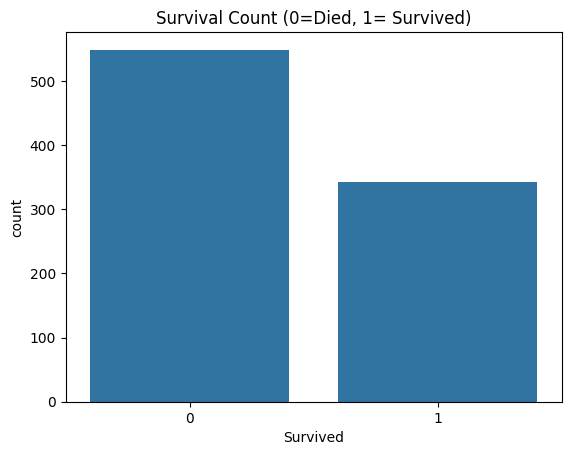

In [12]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0=Died, 1= Survived)")
plt.show()

2. Survived by Gender

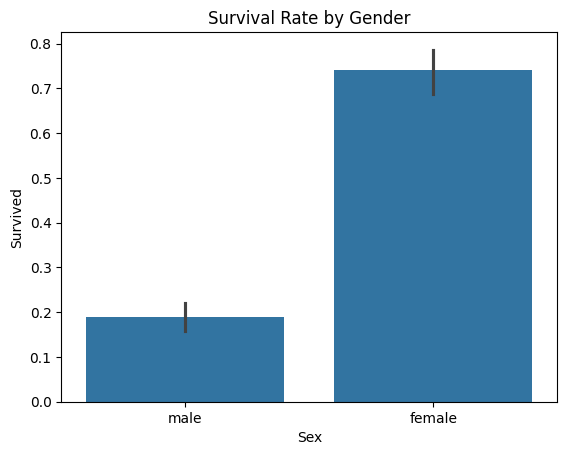

In [13]:
sns.barplot(x='Sex',y = 'Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

##### It is observed that "Female" had higher survival rates as compared to "Male"

3. Survival by Passenger Class

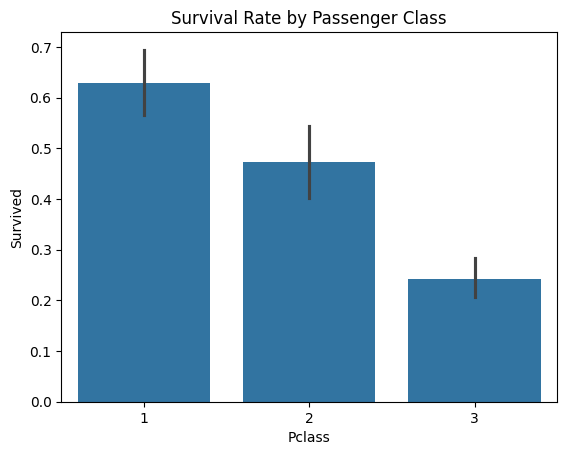

In [14]:
sns.barplot(x='Pclass',y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

##### From this bar plot it can be analysed that "1st Class Passengers" survived more than 3rd class

4.Age Distribution

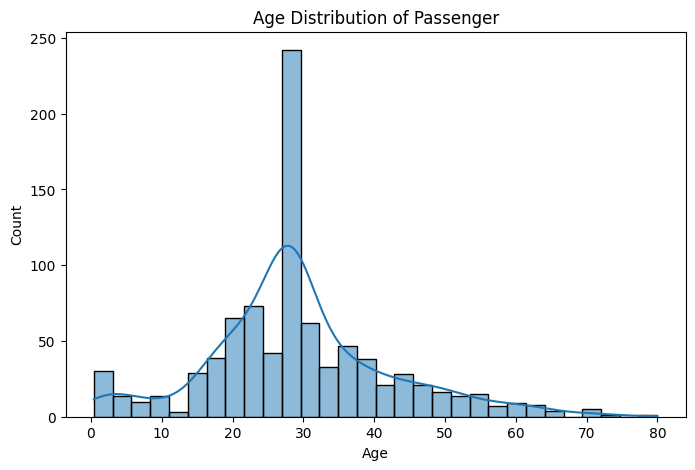

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title("Age Distribution of Passenger")
plt.show()

##### From this histogram it is observed that young people age between 20 to 40 had slightly higher chances of survival

5. Correlation Heatmap

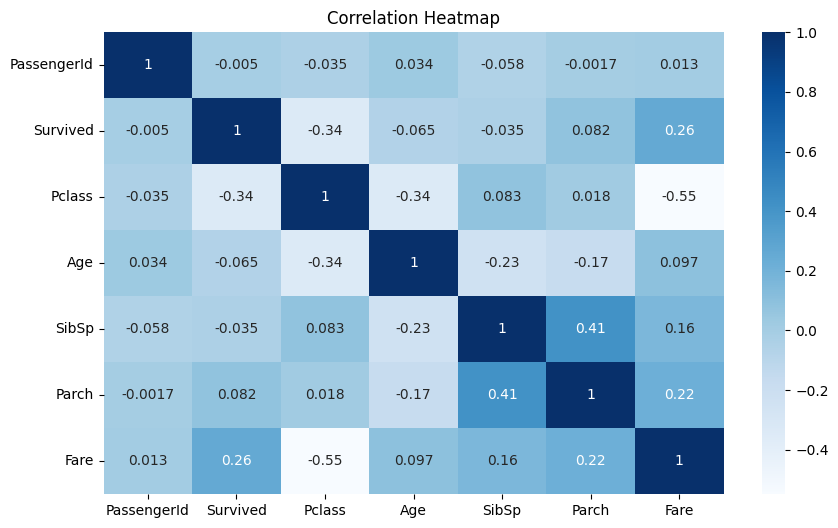

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 3.4 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 3.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 3.2 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 2.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 2.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.1 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.0 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 1.9 MB/s eta 0:00:03
   ------------------ --

In [20]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [21]:
fig= px.pie(df, names='Survived', title=" Survival")
fig.show()

### Analysis Report

##### - Women had higher survival rates compared to men
##### - 1st class passengers survived more often than 3rd class
##### - Younger passengers had slightly higher chances of survival